In [1]:
# Project Idea Intro and Context
  # Maybe a drawing or FBD here?
# Governing Equations for System
  # Has to be first order for IVP
  # Parameters and Assumptions
# Code to find the "true" solution
# Code to implement RK4
# Results and Discussion
  # Include error, convergence rate, "proof" that the system is not at resonance
# Conclusion
# Acknowledgements/Sources
  # GPT and other stuff

<div style="text-align: center;">

# **Research Paper Title**  

## Author Name  
**University Name**  
**Department Name**  
**Course Name**  

### Date: Month Day, Year  

</div>  

---

**Abstract:**  
Brief summary of the research, key findings, and conclusions.  

**Keywords:**  
Keyword 1, Keyword 2, Keyword 3  


# Derivation of the Flywheel System Equations (GPT)

## 1. Governing Equations

We start with **Newton's Second Law for Rotational Motion**, which states:

$$
I \ddot{\theta} + C \dot{\theta} + K \theta = \tau(t)
$$

where:

- $I$ is the **mass moment of inertia matrix**,
- $C$ is the **damping matrix**,
- $K$ is the **stiffness matrix**,
- $\theta$ is the **angular displacement vector**,
- $\omega = \dot{\theta}$ is the **angular velocity vector**,
- $\tau(t)$ is the **external torque vector**.

To solve this system numerically, we rewrite it in **state-space form**.

## 2. State-Space Representation

Define the state vector:

$$
\mathbf{x} =
\begin{bmatrix}
\theta \\
\omega
\end{bmatrix}
$$

where:

- $\theta$ represents angular displacement,
- $\omega = \dot{\theta}$ represents angular velocity.

Rewriting the second-order equation as a system of **first-order differential equations**:

$$
\begin{aligned}
\dot{\theta} &= \omega \\
I \dot{\omega} &= \tau(t) - C \omega - K \theta
\end{aligned}
$$

Rearrange to isolate $\dot{\omega}$:

$$
\dot{\omega} = I^{-1} (\tau(t) - C \omega - K \theta)
$$

Now we write this in **matrix form**:

$$
\frac{d}{dt}
\begin{bmatrix}
\theta \\
\omega
\end{bmatrix}
=
\begin{bmatrix}
0 & I \\
- I^{-1} K & -I^{-1} C
\end{bmatrix}
\begin{bmatrix}
\theta \\
\omega
\end{bmatrix}
+
\begin{bmatrix}
0 \\
I^{-1}
\end{bmatrix} \tau(t)
$$

This is now in the standard **state-space form**:

$$
\dot{\mathbf{x}} = A \mathbf{x} + B \tau
$$

where:

- **System matrix ($A$):**  
  $$
  A =
  \begin{bmatrix}
  0 & I \\
  -I^{-1} K & -I^{-1} C
  \end{bmatrix}
  $$

- **Input matrix ($B$):**  
  $$
  B =
  \begin{bmatrix}
  0 \\
  I^{-1}
  \end{bmatrix}
  $$

- **Input (torque) vector ($\tau$):**  
  $$
  \tau =
  \begin{bmatrix}
  \tau_1 \\
  \tau_2 \\
  \tau_3
  \end{bmatrix}
  $$

## 3. Example: 3-Flywheel System

If we have **three flywheels**, the system matrices look like:

- **Inertia matrix:**
  $$
  I =
  \begin{bmatrix}
  I_1 & 0 & 0 \\
  0 & I_2 & 0 \\
  0 & 0 & I_3
  \end{bmatrix}
  $$

- **Damping matrix:**
  $$
  C =
  \begin{bmatrix}
  c_1 & 0 & 0 \\
  0 & c_2 & 0 \\
  0 & 0 & c_3
  \end{bmatrix}
  $$

- **Stiffness matrix:**
  $$
  K =
  \begin{bmatrix}
  k_1 & 0 & 0 \\
  0 & k_2 & 0 \\
  0 & 0 & k_3
  \end{bmatrix}
  $$

- **System matrix ($A$):**
  $$
  A =
  \begin{bmatrix}
  0 & 1 & 0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 1 & 0 & 0 \\
  0 & 0 & 0 & 0 & 0 & 1 \\
  -\frac{k_1}{I_1} & 0 & 0 & -\frac{c_1}{I_1} & 0 & 0 \\
  0 & -\frac{k_2}{I_2} & 0 & 0 & -\frac{c_2}{I_2} & 0 \\
  0 & 0 & -\frac{k_3}{I_3} & 0 & 0 & -\frac{c_3}{I_3}
  \end{bmatrix}
  $$

- **Input matrix ($B$):**
  $$
  B =
  \begin{bmatrix}
  0 & 0 & 0 \\
  0 & 0 & 0 \\
  0 & 0 & 0 \\
  \frac{1}{I_1} & 0 & 0 \\
  0 & \frac{1}{I_2} & 0 \\
  0 & 0 & \frac{1}{I_3}
  \end{bmatrix}
  $$

## 4. Numerical Solution Using RK4

To solve for $\mathbf{x}(t)$ numerically, we use **Runge-Kutta 4th Order (RK4)**:

1. Define the function:
   $$
   \dot{\mathbf{x}} = A \mathbf{x} + B \tau
   $$
   
2. Implement **RK4** step-by-step to solve for $\mathbf{x}(t)$.

3. Extract **angular displacements ($\theta$)** and **angular velocities ($\omega$)** over time.

## 5. Natural Frequencies

To find the **natural frequencies**, compute the eigenvalues of $A$:

$$
\text{Eigenvalues of } A = \lambda_i
$$

The imaginary part of $\lambda_i$ gives the system's **oscillation frequency**.

---


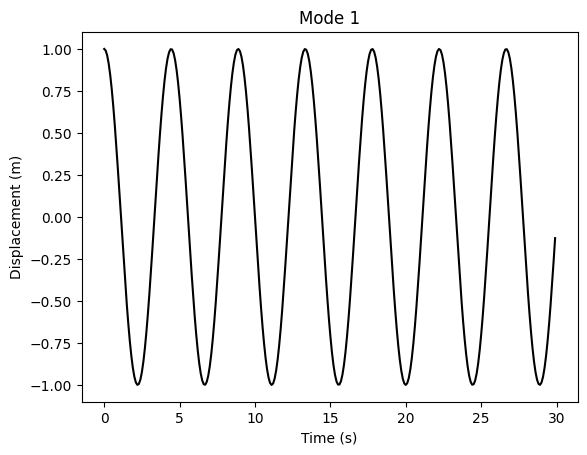

2.0


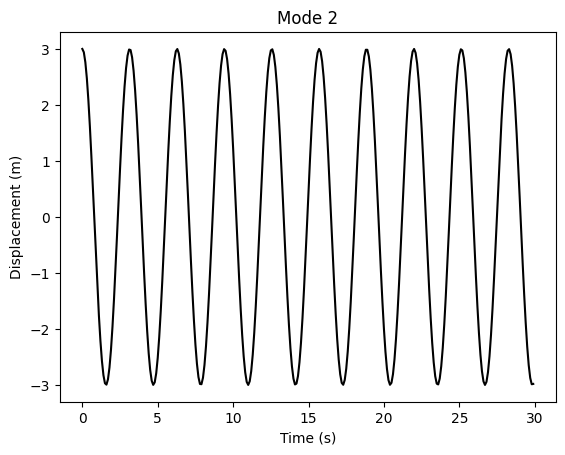

4.0


In [2]:
# for homogenous solutions, just need the stiffness matrix and initial value
import numpy as np
import matplotlib.pyplot as plt

m = 10
C_x = 1
K_x = 2
C_y = 3
K_y = 4
eccen = 1
omega = 2
phi = 0

stiffness = np.array([[K_x, 0],[0, K_y]])

eig, eigvec = np.linalg.eig(stiffness)
S = eigvec
x_0 = [1,3] # Initial Condition for each spring
S_inv = np.linalg.inv(S)
q_0 = S_inv @ x_0 # Initial condition for eigensystem
size = len(stiffness)
omega = np.zeros(size)
A = np.zeros(size)

for i in range (0,size): # Computing natural frequency of each mass, along with constant coefficients
    omega[i] = np.sqrt(abs(eig[i]))
    A[i] = q_0[i]

time = np.arange(0, 30, 0.1)
q = np.array([A[i] * np.cos(omega[i] * time) for i in range(size)])

for i in range(size):
    plt.plot(time, q[i], color='black')
    plt.title(f'Mode {i+1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (m)')
    plt.show()
    print(eig[i])
# find eigenvalue to get modes of the system
# find eigenvectors to get S matrix to then get q, the equations for modes of the system

# for particular solution, refer to 352P2

In [ ]:
# particular solution
# need mass, stiffness, and damping matrix (independent)
# Construct augmented matrices A and B

from sympy import *

K = np.array([[K_x, 0],[0, K_y]])
C = np.array([[C_x, 0],[0, C_y]])
M = np.array([[m, 0],[0, m]])

Z = np.zeros((size, size))
I = np.eye(size)

A = np.block([[Z, I], [K, C]])
B = np.block([[I, Z], [Z, M]])

# Solve the generalized eigenvalue problem
eigvals, eigvecs = np.linalg.eig([A, B])

# Sort eigenvalues by real part
idx = np.argsort(np.real(eigvals))
print(idx)
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Define initial conditions
x0 = np.array([1,3])  # Initial displacement
v0 = np.array([0,0])  # Initial velocity

# Construct initial state vector
X0 = np.concatenate((x0, v0))

# Compute coefficients
C_sol = np.linalg.solve(eigvecs, X0)

# Time evolution
t = np.linspace(0, 20, 1000)  # Time from 0 to 5 seconds

# Compute real displacement solution
X_t = np.array([np.real(eigvecs @ (np.diag(np.exp(eigvals * ti)) @ C_sol)) for ti in t])

# Extract displacement components
x_t = X_t[:, :size]  # First 4 rows are displacements

# Plot results
plt.figure(figsize=(10, 5))
for i in range(size):
    plt.plot(t, x_t[:, i], label=f'Rib {i+1}')
plt.xlabel("Time (s)")
plt.ylabel("Displacement")
plt.legend()
plt.grid()
plt.show()

[[0 2 1 3]
 [0 1 2 3]]


IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
def rk4(f, y0, t0, tf, dt):
    """
    RK4 method for solving ODEs

    Args:
    f: Function representing the derivative dy/dt
    y0: Initial value of the function y at t = t0
    t0: Initial time
    tf: Final time
    dt: Time step size

    Returns:
    ts: List of time points
    ys: List of solution values at corresponding time points
    """
    n = int((tf - t0) / dt)
    ts = [t0]
    ys = [y0]

    for _ in range(n):
        t = ts[-1]
        y = ys[-1]

        k1 = dt * f(t, y)
        k2 = dt * f(t + 0.5 * dt, y + 0.5 * k1)
        k3 = dt * f(t + 0.5 * dt, y + 0.5 * k2)
        k4 = dt * f(t + dt, y + k3)

        yn = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        tn = t + dt

        ts.append(tn)
        ys.append(yn)

    return ts, ys

# Example usage
# Define a differential equation, for example: dy/dt = -2y + t
def f(t, y):
    return -2 * y + t

# Initial condition
y0 = 1
t0 = 0
tf = 10
dt = 0.1

# Solve the ODE
ts, ys = rk4(f, y0, t0, tf, dt)

# Display results
for t, y in zip(ts, ys):
    print(f"t = {t:.2f}, y = {y:.4f}")


t = 0.00, y = 1.0000
t = 0.10, y = 0.8234
t = 0.20, y = 0.6879
t = 0.30, y = 0.5860
t = 0.40, y = 0.5117
t = 0.50, y = 0.4599
t = 0.60, y = 0.4265
t = 0.70, y = 0.4083
t = 0.80, y = 0.4024
t = 0.90, y = 0.4066
t = 1.00, y = 0.4192
t = 1.10, y = 0.4385
t = 1.20, y = 0.4634
t = 1.30, y = 0.4928
t = 1.40, y = 0.5260
t = 1.50, y = 0.5622
t = 1.60, y = 0.6010
t = 1.70, y = 0.6417
t = 1.80, y = 0.6842
t = 1.90, y = 0.7280
t = 2.00, y = 0.7729
t = 2.10, y = 0.8187
t = 2.20, y = 0.8653
t = 2.30, y = 0.9126
t = 2.40, y = 0.9603
t = 2.50, y = 1.0084
t = 2.60, y = 1.0569
t = 2.70, y = 1.1056
t = 2.80, y = 1.1546
t = 2.90, y = 1.2038
t = 3.00, y = 1.2531
t = 3.10, y = 1.3025
t = 3.20, y = 1.3521
t = 3.30, y = 1.4017
t = 3.40, y = 1.4514
t = 3.50, y = 1.5011
t = 3.60, y = 1.5509
t = 3.70, y = 1.6008
t = 3.80, y = 1.6506
t = 3.90, y = 1.7005
t = 4.00, y = 1.7504
t = 4.10, y = 1.8003
t = 4.20, y = 1.8503
t = 4.30, y = 1.9002
t = 4.40, y = 1.9502
t = 4.50, y = 2.0002
t = 4.60, y = 2.0501
t = 4.70, y =